

Just run this in console in inspect

```
function ClickConnect(){
console.log("Working");
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click()
}
setInterval(ClickConnect,60000)
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torchvision
from torchvision import transforms, utils, datasets, models
import torch.optim as optim

from torchsummary import summary


from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from PIL import Image
import os
import copy
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import time


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

print(torch.__version__)
print(torchvision.__version__)

cuda
1.12.1+cu113
0.13.1+cu113


In [ ]:
path_by_class = '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/EMNIST_by_class.zip'
path_by_merge = '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/EMNIST_by_merge.zip'
path_by_class_h = '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/homoglyphed datasets/H-EMNIST/H-EMNIST.zip'

In [ ]:
! mkdir 'EMNIST_by_class'
! unzip '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/homoglyphed datasets/H-EMNIST/H-EMNIST.zip' -d 'EMNIST_by_class'

train_dir = '/content/EMNIST_by_class/train'
test_dir = '/content/EMNIST_by_class/test'

In [ ]:
# ! mkdir 'EMNIST_by_class'
# ! unzip '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/EMNIST_by_class.zip' -d 'EMNIST_by_class'

# train_dir = '/content/EMNIST_by_class/train'
# test_dir = '/content/EMNIST_by_class/test'

In [ ]:
# ! mkdir 'EMNIST_by_merge'
# ! unzip '/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/EMNIST_by_merge.zip' -d 'EMNIST_by_merge'

# train_dir = '/content/EMNIST_by_merge/train'
# test_dir = '/content/EMNIST_by_merge/test'

In [ ]:
all_cats = sorted(os.listdir(train_dir))
char_idx = {i:j for i,j in zip(all_cats,list(range(len(all_cats))))}
idx_char = {i:j for i,j in zip(list(range(len(all_cats))),all_cats)}

In [ ]:
print(char_idx)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51}


In [ ]:
print(idx_char)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z'}


In [ ]:
len(all_cats)

52

In [ ]:
dirs = [train_dir, test_dir]
train_subdirs, test_subdirs = {i:os.path.join(train_dir,i) for i in all_cats} , {i:os.path.join(test_dir,i) for i in all_cats}

subdirs = [train_subdirs, test_subdirs]

In [ ]:
dfs = {'train_df':{'label':[], 'img_path':[]}, 'test_df':{'label':[], 'img_path':[]}}

for subdir,df in zip(subdirs,dfs.keys()):
  print(df)
  for label,root in tqdm(subdir.items()):
    for file_name in os.listdir(root):
      dfs[df]['img_path'].append(os.path.join(root,file_name))
      dfs[df]['label'].append(char_idx[label])


train_df


100%|██████████| 52/52 [00:00<00:00, 71.41it/s]


test_df


100%|██████████| 52/52 [00:00<00:00, 394.66it/s]


In [ ]:
train_df = pd.DataFrame(dfs['train_df'])
test_df = pd.DataFrame(dfs['test_df'])

In [ ]:
train_df

,label,img_path
0,0,/content/EMNIST_by_class/train/A/A_4249.png
1,0,/content/EMNIST_by_class/train/A/A_3750.png
2,0,/content/EMNIST_by_class/train/A/A_1945.png
3,0,/content/EMNIST_by_class/train/A/A_5826.png
4,0,/content/EMNIST_by_class/train/A/A_20.png
...,...,...
358606,51,/content/EMNIST_by_class/train/z/z_462.png
358607,51,/content/EMNIST_by_class/train/z/z_2182.png
358608,51,/content/EMNIST_by_class/train/z/z_909.png
358609,51,/content/EMNIST_by_class/train/z/z_611.png


In [ ]:
test_df

,label,img_path
0,0,/content/EMNIST_by_class/test/A/A_20.png
1,0,/content/EMNIST_by_class/test/A/A_878.png
2,0,/content/EMNIST_by_class/test/A/A_446.png
3,0,/content/EMNIST_by_class/test/A/A_721.png
4,0,/content/EMNIST_by_class/test/A/A_629.png
...,...,...
58998,51,/content/EMNIST_by_class/test/z/z_370.png
58999,51,/content/EMNIST_by_class/test/z/z_332.png
59000,51,/content/EMNIST_by_class/test/z/z_448.png
59001,51,/content/EMNIST_by_class/test/z/z_357.png


In [ ]:
train_df.iloc[190]['img_path']

'/content/EMNIST_by_class/train/A/A_4_H.png'

In [ ]:
Image.open('/content/EMNIST_by_class/test/z/z_253.png').size

(28, 28)

# Model

In [ ]:
# from https://github.dev/austin-hill/EMNIST-CNN

class EMNIST_CNN(nn.Module):
    def __init__(self, fmaps1, fmaps2, dense, dropout, num_classes=52):
        super(EMNIST_CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=fmaps1, kernel_size=5, stride=1, padding='same'),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=fmaps1, out_channels=fmaps2, kernel_size=5, stride=1, padding='same'),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.fcon1 = nn.Sequential(nn.Linear(49*fmaps2, dense), nn.LeakyReLU())
        self.fcon2 = nn.Linear(dense, num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(self.fcon1(x))
        x = self.fcon2(x)
        return x

In [ ]:
test_model = EMNIST_CNN(40, 160, 200, 0.4)

In [ ]:
summary(test_model, (1, 28, 28).to(device))

# Dataloader

In [ ]:

class EMNISTDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.annotations = csv_file
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = self.annotations.iloc[idx]['img_path']
        image = Image.open(img_path)

        y_label = torch.tensor(int(self.annotations.iloc[idx]['label']))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

    def get_labels(self):
        return self.annotations['label']

In [ ]:
def find_mean_std(datasets,batch_s=1):
    means_stds=[]
    for dataset in datasets:
        to_norm_loader=DataLoader(dataset=dataset, batch_size=batch_s)
        print('Total number of samples: ', len(dataset))

        # #run for 1 batch
        # data_iter=iter(to_norm_loader)
        # img,_,__=data_iter.next()
        # print(img.shape)

        channels_sum, channels_squared_sum, num_batches=0, 0, 0
        for img,_ in tqdm(to_norm_loader):
            # print(img.shape)#[batch,C,H,W]
            img= img
            channels_sum+=torch.mean(img,dim=[0,2,3])
            channels_squared_sum+=torch.mean(img**2,dim=[0,2,3])
            num_batches+=1

        mean=channels_sum/num_batches
        std=(channels_squared_sum/num_batches- mean**2)**0.5
        means_stds.append(mean)
        means_stds.append(std)
    return means_stds

In [ ]:
h,w = 28,28
batch_size = 1000

In [ ]:
# for finding mean and std

transform=transforms.Compose([
                              transforms.Grayscale(num_output_channels=1),
                              transforms.Resize((h,w)),
                              transforms.ToTensor(),
])


train_dataset = EMNISTDataset(csv_file=train_df, transform=transform)
val_dataset = EMNISTDataset(csv_file=test_df, transform=transform)

In [ ]:
# find mean and std
find_mean_std([train_dataset, val_dataset],batch_s=batch_size)

Total number of samples:  358611


100%|██████████| 359/359 [04:24<00:00,  1.36it/s]


Total number of samples:  59003


100%|██████████| 60/60 [00:41<00:00,  1.43it/s]


[tensor([0.1746]), tensor([0.3323]), tensor([0.1750]), tensor([0.3323])]

In [ ]:
train_transform=transforms.Compose([
                                    transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((h,w)),
                                    transforms.CenterCrop((h,w)),
                                    # transforms.RandomHorizontalFlip(),
                                    transforms.ColorJitter(
#                                                            contrast=(0,5),
#                                                            saturation=(3,10),
                                                            hue=(0,.5)
                                                          ),
                                    transforms.RandomAffine(30,shear=0.2),
#                                     transforms.RandomAffine(degrees=(-45,+45), scale=(1,2)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.1746],
                                                       std=[0.3323]
                                                      ),
])

val_transform=transforms.Compose([
                            transforms.Grayscale(num_output_channels=1),
                              transforms.Resize((h,w)),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.1750],
                                                   std=[0.3323]
                                                  ),
])


train_dataset = EMNISTDataset(csv_file=train_df, transform=train_transform)
val_dataset = EMNISTDataset(csv_file=test_df, transform=val_transform)

In [ ]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

torch.Size([1, 28, 28])


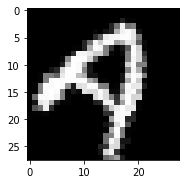

In [ ]:
im,lab=train_dataset[200]
print(im.shape)

unorm = UnNormalize(mean=[0.1747], std=[0.3322])
im=unorm(im)

show_im=transforms.ToPILImage()(im)

plt.subplot(121)
plt.imshow(show_im, cmap='gray')

In [ ]:
train_dataloader= DataLoader(dataset=train_dataset, batch_size=64,shuffle=True)

val_dataloader= DataLoader(dataset=val_dataset, batch_size=1000)

# Train

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, scheduler=None):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                        if scheduler != None:
                          scheduler.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,
                    }, f'/content/drive/MyDrive/Homoglyphed code-mixed/checkpoints/H-EMNIST by class letters/HEMNIST_CNN_{epoch}.pth')
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [ ]:
model = EMNIST_CNN(40, 160, 200, 0.4, 52).to(device)

loss_function=nn.CrossEntropyLoss()
# optimizer=optim.Adam(model.classifier[1].parameters(),lr=0.001,weight_decay=6e-5)
optimizer=optim.SGD( model.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)


In [ ]:
# checkpoint = torch.load('../input/effi-net-attempt2-16/effi_net_b2_epoch_16.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
# # optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


# model.train()

In [ ]:
model, val_acc_history= train_model(model,
                                    dataloaders={'train':train_dataloader,
                                                'val':val_dataloader
                                                },
                                    criterion=loss_function,
                                    optimizer=optimizer,
                                    num_epochs=100
                                   )

Epoch 0/99
----------


100%|██████████| 5604/5604 [07:40<00:00, 12.17it/s]


train Loss: 1.1626 Acc: 0.6656


100%|██████████| 60/60 [00:59<00:00,  1.01it/s]


val Loss: 0.5474 Acc: 0.8169

Epoch 1/99
----------


100%|██████████| 5604/5604 [07:33<00:00, 12.35it/s]


train Loss: 0.6730 Acc: 0.7842


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


val Loss: 0.4767 Acc: 0.8356

Epoch 2/99
----------


100%|██████████| 5604/5604 [07:33<00:00, 12.35it/s]


train Loss: 0.6036 Acc: 0.8019


100%|██████████| 60/60 [00:54<00:00,  1.10it/s]


val Loss: 0.4559 Acc: 0.8380

Epoch 3/99
----------


100%|██████████| 5604/5604 [07:36<00:00, 12.27it/s]


train Loss: 0.5642 Acc: 0.8121


100%|██████████| 60/60 [00:52<00:00,  1.15it/s]


val Loss: 0.4365 Acc: 0.8434

Epoch 4/99
----------


100%|██████████| 5604/5604 [07:32<00:00, 12.38it/s]


train Loss: 0.5373 Acc: 0.8192


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


val Loss: 0.4261 Acc: 0.8470

Epoch 5/99
----------


100%|██████████| 5604/5604 [07:33<00:00, 12.36it/s]


train Loss: 0.5177 Acc: 0.8236


100%|██████████| 60/60 [00:52<00:00,  1.15it/s]


val Loss: 0.4155 Acc: 0.8490

Epoch 6/99
----------


100%|██████████| 5604/5604 [07:30<00:00, 12.43it/s]


train Loss: 0.5037 Acc: 0.8267


100%|██████████| 60/60 [00:52<00:00,  1.15it/s]


val Loss: 0.4060 Acc: 0.8525

Epoch 7/99
----------


100%|██████████| 5604/5604 [07:25<00:00, 12.57it/s]


train Loss: 0.4905 Acc: 0.8311


100%|██████████| 60/60 [00:51<00:00,  1.17it/s]


val Loss: 0.4019 Acc: 0.8532

Epoch 8/99
----------


100%|██████████| 5604/5604 [07:28<00:00, 12.48it/s]


train Loss: 0.4821 Acc: 0.8325


100%|██████████| 60/60 [00:51<00:00,  1.16it/s]


val Loss: 0.3942 Acc: 0.8550

Epoch 9/99
----------


100%|██████████| 5604/5604 [07:28<00:00, 12.50it/s]


train Loss: 0.4725 Acc: 0.8355


100%|██████████| 60/60 [00:51<00:00,  1.16it/s]


val Loss: 0.3958 Acc: 0.8542

Epoch 10/99
----------


100%|██████████| 5604/5604 [07:32<00:00, 12.39it/s]


train Loss: 0.4639 Acc: 0.8376


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


val Loss: 0.3907 Acc: 0.8560

Epoch 11/99
----------


100%|██████████| 5604/5604 [07:40<00:00, 12.17it/s]


train Loss: 0.4577 Acc: 0.8390


100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


val Loss: 0.3841 Acc: 0.8581

Epoch 12/99
----------


100%|██████████| 5604/5604 [07:35<00:00, 12.30it/s]


train Loss: 0.4518 Acc: 0.8410


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


val Loss: 0.3865 Acc: 0.8565

Epoch 13/99
----------


100%|██████████| 5604/5604 [07:33<00:00, 12.36it/s]


train Loss: 0.4473 Acc: 0.8421


100%|██████████| 60/60 [00:52<00:00,  1.14it/s]


val Loss: 0.3848 Acc: 0.8578

Epoch 14/99
----------


100%|██████████| 5604/5604 [07:42<00:00, 12.13it/s]


train Loss: 0.4429 Acc: 0.8430


100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


val Loss: 0.3799 Acc: 0.8586

Epoch 15/99
----------


100%|██████████| 5604/5604 [07:42<00:00, 12.13it/s]


train Loss: 0.4375 Acc: 0.8444


100%|██████████| 60/60 [00:53<00:00,  1.13it/s]


val Loss: 0.3784 Acc: 0.8596

Epoch 16/99
----------


100%|██████████| 5604/5604 [07:38<00:00, 12.23it/s]


train Loss: 0.4339 Acc: 0.8453


100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


val Loss: 0.3790 Acc: 0.8592

Epoch 17/99
----------


100%|██████████| 5604/5604 [07:45<00:00, 12.03it/s]


train Loss: 0.4301 Acc: 0.8463


100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


val Loss: 0.3770 Acc: 0.8582

Epoch 18/99
----------


100%|██████████| 5604/5604 [07:44<00:00, 12.07it/s]


train Loss: 0.4280 Acc: 0.8470


100%|██████████| 60/60 [00:53<00:00,  1.13it/s]


val Loss: 0.3761 Acc: 0.8609

Epoch 19/99
----------


100%|██████████| 5604/5604 [07:43<00:00, 12.08it/s]


train Loss: 0.4239 Acc: 0.8479


100%|██████████| 60/60 [00:52<00:00,  1.13it/s]


val Loss: 0.3778 Acc: 0.8603

Epoch 20/99
----------


100%|██████████| 5604/5604 [07:45<00:00, 12.05it/s]


train Loss: 0.4200 Acc: 0.8486


100%|██████████| 60/60 [00:52<00:00,  1.13it/s]


val Loss: 0.3712 Acc: 0.8614

Epoch 21/99
----------


100%|██████████| 5604/5604 [07:41<00:00, 12.14it/s]


train Loss: 0.4186 Acc: 0.8490


100%|██████████| 60/60 [00:55<00:00,  1.08it/s]


val Loss: 0.3718 Acc: 0.8602

Epoch 22/99
----------


100%|██████████| 5604/5604 [07:42<00:00, 12.11it/s]


train Loss: 0.4155 Acc: 0.8500


100%|██████████| 60/60 [00:53<00:00,  1.13it/s]


val Loss: 0.3730 Acc: 0.8609

Epoch 23/99
----------


 86%|████████▌ | 4825/5604 [06:44<01:02, 12.44it/s]

In [ ]:
val_acc_history

Epoch 0/99
----------
100%|██████████| 5604/5604 [07:40<00:00, 12.17it/s]
train Loss: 1.1626 Acc: 0.6656
100%|██████████| 60/60 [00:59<00:00,  1.01it/s]
val Loss: 0.5474 Acc: 0.8169

Epoch 1/99
----------
100%|██████████| 5604/5604 [07:33<00:00, 12.35it/s]
train Loss: 0.6730 Acc: 0.7842
100%|██████████| 60/60 [00:52<00:00,  1.14it/s]
val Loss: 0.4767 Acc: 0.8356

Epoch 2/99
----------
100%|██████████| 5604/5604 [07:33<00:00, 12.35it/s]
train Loss: 0.6036 Acc: 0.8019
100%|██████████| 60/60 [00:54<00:00,  1.10it/s]
val Loss: 0.4559 Acc: 0.8380

Epoch 3/99
----------
100%|██████████| 5604/5604 [07:36<00:00, 12.27it/s]
train Loss: 0.5642 Acc: 0.8121
100%|██████████| 60/60 [00:52<00:00,  1.15it/s]
val Loss: 0.4365 Acc: 0.8434

Epoch 4/99
----------
100%|██████████| 5604/5604 [07:32<00:00, 12.38it/s]
train Loss: 0.5373 Acc: 0.8192
100%|██████████| 60/60 [00:52<00:00,  1.14it/s]
val Loss: 0.4261 Acc: 0.8470

Epoch 5/99
----------
100%|██████████| 5604/5604 [07:33<00:00, 12.36it/s]
train Loss: 0.5177 Acc: 0.8236
100%|██████████| 60/60 [00:52<00:00,  1.15it/s]
val Loss: 0.4155 Acc: 0.8490

Epoch 6/99
----------
100%|██████████| 5604/5604 [07:30<00:00, 12.43it/s]
train Loss: 0.5037 Acc: 0.8267
100%|██████████| 60/60 [00:52<00:00,  1.15it/s]
val Loss: 0.4060 Acc: 0.8525

Epoch 7/99
----------
100%|██████████| 5604/5604 [07:25<00:00, 12.57it/s]
train Loss: 0.4905 Acc: 0.8311
100%|██████████| 60/60 [00:51<00:00,  1.17it/s]
val Loss: 0.4019 Acc: 0.8532

Epoch 8/99
----------
100%|██████████| 5604/5604 [07:28<00:00, 12.48it/s]
train Loss: 0.4821 Acc: 0.8325
100%|██████████| 60/60 [00:51<00:00,  1.16it/s]
val Loss: 0.3942 Acc: 0.8550

Epoch 9/99
----------
100%|██████████| 5604/5604 [07:28<00:00, 12.50it/s]
train Loss: 0.4725 Acc: 0.8355
100%|██████████| 60/60 [00:51<00:00,  1.16it/s]
val Loss: 0.3958 Acc: 0.8542

Epoch 10/99
----------
100%|██████████| 5604/5604 [07:32<00:00, 12.39it/s]
train Loss: 0.4639 Acc: 0.8376
100%|██████████| 60/60 [00:52<00:00,  1.14it/s]
val Loss: 0.3907 Acc: 0.8560

Epoch 11/99
----------
100%|██████████| 5604/5604 [07:40<00:00, 12.17it/s]
train Loss: 0.4577 Acc: 0.8390
100%|██████████| 60/60 [00:53<00:00,  1.12it/s]
val Loss: 0.3841 Acc: 0.8581

Epoch 12/99
----------
100%|██████████| 5604/5604 [07:35<00:00, 12.30it/s]
train Loss: 0.4518 Acc: 0.8410
100%|██████████| 60/60 [00:52<00:00,  1.14it/s]
val Loss: 0.3865 Acc: 0.8565

Epoch 13/99
----------
100%|██████████| 5604/5604 [07:33<00:00, 12.36it/s]
train Loss: 0.4473 Acc: 0.8421
100%|██████████| 60/60 [00:52<00:00,  1.14it/s]
val Loss: 0.3848 Acc: 0.8578

Epoch 14/99
----------
100%|██████████| 5604/5604 [07:42<00:00, 12.13it/s]
train Loss: 0.4429 Acc: 0.8430
100%|██████████| 60/60 [00:53<00:00,  1.12it/s]
val Loss: 0.3799 Acc: 0.8586

Epoch 15/99
----------
100%|██████████| 5604/5604 [07:42<00:00, 12.13it/s]
train Loss: 0.4375 Acc: 0.8444
100%|██████████| 60/60 [00:53<00:00,  1.13it/s]
val Loss: 0.3784 Acc: 0.8596

Epoch 16/99
----------
100%|██████████| 5604/5604 [07:38<00:00, 12.23it/s]
train Loss: 0.4339 Acc: 0.8453
100%|██████████| 60/60 [00:53<00:00,  1.12it/s]
val Loss: 0.3790 Acc: 0.8592

Epoch 17/99
----------
100%|██████████| 5604/5604 [07:45<00:00, 12.03it/s]
train Loss: 0.4301 Acc: 0.8463
100%|██████████| 60/60 [00:53<00:00,  1.12it/s]
val Loss: 0.3770 Acc: 0.8582

Epoch 18/99
----------
100%|██████████| 5604/5604 [07:44<00:00, 12.07it/s]
train Loss: 0.4280 Acc: 0.8470
100%|██████████| 60/60 [00:53<00:00,  1.13it/s]
val Loss: 0.3761 Acc: 0.8609

Epoch 19/99
----------
100%|██████████| 5604/5604 [07:43<00:00, 12.08it/s]
train Loss: 0.4239 Acc: 0.8479
100%|██████████| 60/60 [00:52<00:00,  1.13it/s]
val Loss: 0.3778 Acc: 0.8603

Epoch 20/99
----------
100%|██████████| 5604/5604 [07:45<00:00, 12.05it/s]
train Loss: 0.4200 Acc: 0.8486
100%|██████████| 60/60 [00:52<00:00,  1.13it/s]
val Loss: 0.3712 Acc: 0.8614

Epoch 21/99
----------
100%|██████████| 5604/5604 [07:41<00:00, 12.14it/s]
train Loss: 0.4186 Acc: 0.8490
100%|██████████| 60/60 [00:55<00:00,  1.08it/s]
val Loss: 0.3718 Acc: 0.8602

Epoch 22/99
----------
100%|██████████| 5604/5604 [07:42<00:00, 12.11it/s]
train Loss: 0.4155 Acc: 0.8500
100%|██████████| 60/60 [00:53<00:00,  1.13it/s]
val Loss: 0.3730 Acc: 0.8609

Epoch 23/99
----------
 86%|████████▌ | 4825/5604 [06:44<01:02, 12.44it/s]
